#### Data analysis notebook

Reads in the data files and plot results

  * Instantiate analyzer class object **Geant4Analyzer(root_filename, label)**
  * Then apply cuts to the data
  * Plotting with the built-in function **plot_histogram()**
  * For user defined plots, just access the data elements directly: **Geant4Analyzer.data[element_name]**. Get the data element names from **Geant4Analyzer.data.keys()**

In [1]:
from RunManager import RunManager
from Geant4Analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np

In [5]:
manager = RunManager("../scripts/config.json")
display(manager.display_all_runs(include_deleted=False))

,id,particle,energy,fastSimulation,maxScatters,maxEnergy,sourceVolume,outputDir,outputFile,settingsFile,numEvents,status,randomSeed,numJobs
0,run_01,geantino,1.MeV,true,1,0.2 MeV,InnerCryostat,/data/xenon/acolijn/G4FastSim/20240723_164712,fast.root,settings.json,1000000,active,NaN,NaN
1,run_02,gamma,1.MeV,false,-999,-1 MeV,InnerCryostat,/data/xenon/acolijn/G4FastSim/20240723_164859,std.root,settings.json,1000000,active,NaN,NaN
2,run_03,geantino,1.MeV,true,1,0.2 MeV,OuterCryostat,/data/xenon/acolijn/G4FastSim/20240723_222822,fast.root,settings.json,1000000,active,NaN,NaN
3,run_04,gamma,1.MeV,false,-999,-1 MeV,OuterCryostat,/data/xenon/acolijn/G4FastSim/20240723_222944,std.root,settings.json,1000000,active,NaN,NaN
4,run_05,gamma,1.MeV,false,-999,-1 MeV,OuterCryostat,/data/xenon/acolijn/G4FastSim/20240723_225802,std.root,settings.json,1000000,active,NaN,NaN
5,run_06,gamma,1.MeV,false,-999,-1 MeV,OuterCryostat,/data/xenon/acolijn/G4FastSim/20240723_231646,std.root,settings.json,1000000,active,849728.0,NaN
6,run_07,gamma,1.MeV,false,-999,-1 MeV,OuterCryostat,/data/xenon/acolijn/G4FastSim/20240723_233255,std.root,settings.json,1000000,active,709908.0,NaN
7,run_08,geantino,1.MeV,true,1,1.2 MeV,OuterCryostat,/data/xenon/acolijn/G4FastSim/20240723_234446,fast.root,settings.json,1000000,active,11227.0,NaN
8,run_09,geantino,1.MeV,true,1,1.2 MeV,OuterCryostat,/data/xenon/acolijn/G4FastSim/20240724_205923_...,NaN,NaN,20000,active,NaN,NaN
9,run_10,geantino,1.MeV,true,1,1.2 MeV,OuterCryostat,/data/xenon/acolijn/G4FastSim/20240724_210907,NaN,NaN,20000,active,167431.0,NaN


Loading /data/xenon/acolijn/G4FastSim/20240723_233255/std.root
Data loaded from 1 files
Loading /data/xenon/acolijn/G4FastSim/20240724_210907/fast_0.root
Loading /data/xenon/acolijn/G4FastSim/20240724_210907/fast_1.root
Data loaded from 2 files
integral = 2613.0
integral = 53.945218638307054


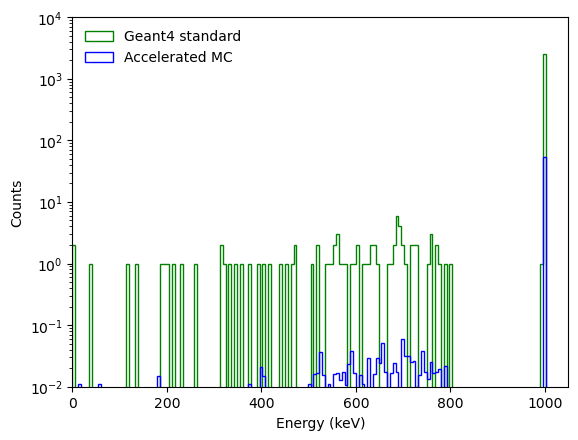

In [4]:
# cut on the global event variables
cut = lambda data: (data['ncomp'] + data['nphot'] == 1) & (data['type'] == 0) & (data['e'] < 1200.) 
# additional cuts on the clusters
cut_hit = lambda data: (data['r'] < 1150.) & (np.abs(data['zh']) < 1100.) 

std = Geant4Analyzer("run_07", label="Geant4 standard", first_only=True)
std.preprocess_data(cut=cut, cut_hit=cut_hit)

fast = Geant4Analyzer("run_10", label="Accelerated MC", first_only=True)
fast.preprocess_data(cut=cut, cut_hit=cut_hit)

nbin = 500
ax = std.plot_histogram('eh', bins=nbin, range=(-1500,1500), show=False)
ax = fast.plot_histogram('eh', bins=nbin, ax=ax, range=(-1500,1500), show=False)

plt.yscale('log')
plt.ylim(1e-2, 1e4)
plt.xlim(0, 1050)

plt.legend(frameon=False)
plt.show()


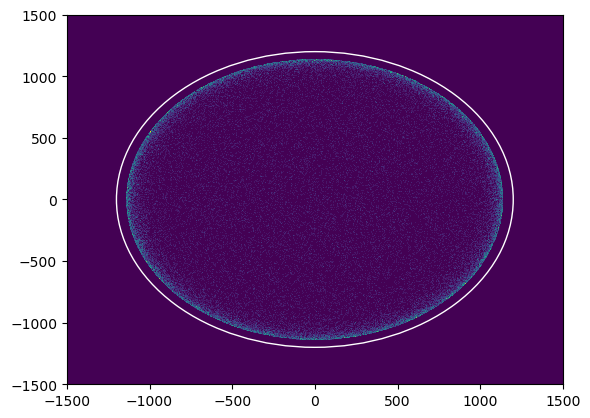

In [7]:
bins = 1000
h = plt.hist2d(fast.data['xh'], fast.data['yh'], bins=bins, range=((-1500, 1500), (-1500, 1500)))
circle = plt.Circle((0,0), fast.settings['innerCryostatRadius'], color='w', fill=False, linewidth=1)
plt.gca().add_artist(circle)
plt.show()
#h = plt.hist2d(std.data['xh'], std.data['yh'], bins=bins, range=((-1500, 1500), (-1500, 1500)))
#plt.scatter(std.data['xp'], std.data['yp'], s=0.01, c='w')


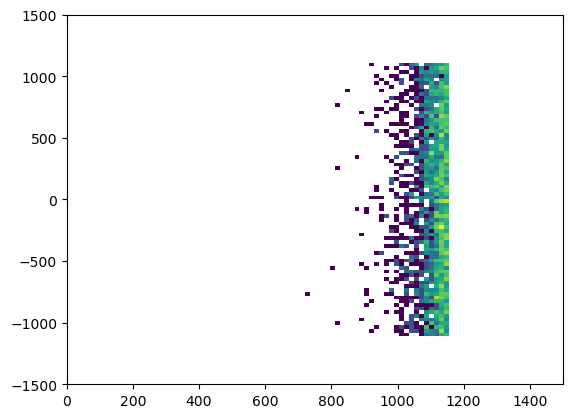

In [19]:
from matplotlib.colors import LogNorm

bins = 100
h = plt.hist2d(std.data['r'], std.data['zh'], bins=bins, range=((0, 1500), (-1500, 1500)), norm=LogNorm())
plt.show()

Data loaded from /data/xenon/acolijn/G4FastSim/20240724_210907/fast_0.root


In [14]:
from RunManager import RunManager

manager = RunManager("../scripts/config.json")

manager.get_output_root_files("run_10", first_only=True)

test = Geant4Analyzer("run_10", label="testing")
test.raw

Data loaded from ['/data/xenon/acolijn/G4FastSim/20240724_210907/fast_0.root']


<Array [{ev: 0, nclus: 0, ...}, ..., {...}] type='10000 * {ev: float64, ncl...'>

In [15]:
import awkward as ak

data_list = []

data_list.append(test.raw)
data_list.append(test.raw)

ccdata = ak.concatenate(data_list, axis=0)

In [16]:
ccdata


<Array [{ev: 0, nclus: 0, ...}, ..., {...}] type='20000 * {ev: float64, ncl...'>